In [4]:
#TASK1
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [14]:
data = boston.data
data.shape

(506, 13)

In [11]:
feature_names = boston.feature_names
target = boston.target
target[:10],feature_names

(array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [12]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [18]:
y = pd.DataFrame(target, columns = ['Price'])
y.shape,y.info(), y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


((506, 1),
 None,
    Price
 0   24.0
 1   21.6
 2   34.7
 3   33.4
 4   36.2)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test)

In [56]:
check_test = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [57]:
from sklearn.metrics import r2_score
r2_metric= r2_score(y_test, y_pred)
r2_metric

0.711226005748496

In [77]:
#TASK2
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [78]:
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)
y_pred.shape

(152,)

In [79]:
r2_metric= r2_score(y_test, y_pred)
r2_metric

0.87472606157312

In [80]:
check_test = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [ ]:
# RANDOMFOREST WORK BETTER

In [81]:
# TASK3
?RandomForestRegressor

In [82]:
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [88]:
rf_importance = pd.DataFrame({
    "feature_name": X_train.columns,
    "feature_importance": model.feature_importances_})

rf_importance = rf_importance.sort_values(
    by="feature_importance", ascending=False
)
rf_importance = rf_importance.reset_index(drop=True)
rf_importance.head(n=2)


,feature_name,feature_importance
0,LSTAT,0.415847
1,RM,0.402682


## Задание 4

* В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.

* Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

* Загрузите датасет creditcard.csv и создайте датафрейм df.

* С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма: pd.options.display.max_columns = 100.

* Просмотрите первые 10 строк датафрейма df.

* Создайте датафрейм X из датафрейма df, исключив столбец Class.

* Создайте объект Series под названием y из столбца Class.

* Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.

* У вас должны получиться объекты X_train, X_test, y_train и y_test. Просмотрите информацию о их форме.

* Для поиска по сетке параметров задайте такие параметры: parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5), 'max_depth': np.arange(4, 7)}]

* Создайте модель GridSearchCV со следующими аргументами: estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3.

* Обучите модель на тренировочном наборе данных (может занять несколько минут).

* Просмотрите параметры лучшей модели с помощью атрибута best_params_.

* Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

* Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.

* Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.


In [29]:
#Task4
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)
data = pd.read_csv("creditcard.csv")
data.head(n=2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [7]:
data["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [10]:
# Выделяем матрицу признаков и вектор с целевой переменной
X, y = data.drop(["Class"], axis=1), data["Class"]

In [15]:
X_train, X_test = train_test_split(
    X, train_size=0.7, random_state=100, stratify=y
)
y_train, y_test = train_test_split(
    y, train_size=0.7, random_state=100, stratify=y
)

print("X_train.shape: {} rows, {} cols".format(*X_train.shape))
print("X_test.shape: {} rows, {} cols".format(*X_test.shape))

X_train.shape: 199364 rows, 30 cols
X_test.shape: 85443 rows, 30 cols


In [16]:
grid = [{
    "n_estimators": [10, 15],
    "max_features": np.arange(3, 5),
    "max_depth": np.arange(4, 7)
}]

model = RandomForestClassifier(random_state=100)

optimizer = GridSearchCV(
    estimator=model,
    param_grid=grid,
    scoring="roc_auc",
    cv=3
)

In [22]:
%%time
optimizer.fit(X_train, y_train)

CPU times: user 1min 12s, sys: 390 ms, total: 1min 13s
Wall time: 1min 13s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [21]:
optimizer.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [24]:
cv_results = list(
    map(
        optimizer.cv_results_.get,
        ["split0_test_score", "split1_test_score", "split2_test_score"]
    )
)
optimizer_results = pd.DataFrame(cv_results)
optimizer_results = optimizer_results.T
optimizer_results.columns = [f"fold_{i+1}" for i in range(len(cv_results))]

In [25]:
optimizer_results

,fold_1,fold_2,fold_3
0,0.966895,0.916214,0.907435
1,0.978767,0.929009,0.905313
2,0.928895,0.954221,0.940128
3,0.941742,0.964412,0.961399
4,0.974722,0.963775,0.909401
5,0.971634,0.960194,0.916500
6,0.977997,0.955770,0.946835
7,0.979438,0.960617,0.947738
8,0.966276,0.957114,0.940705
9,0.974552,0.959064,0.964290


(0.0, 11.0)

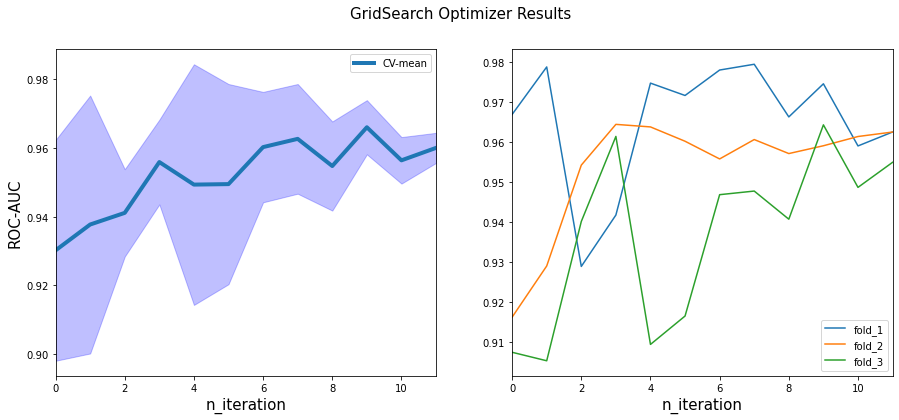

In [30]:
fig = plt.figure(figsize=(15, 6))
plt.suptitle("GridSearch Optimizer Results", size=15)

plt.subplot(121)
plt.plot(optimizer_results.mean(axis=1), linewidth=4, label="CV-mean")
plt.fill_between(
    x=range(optimizer_results.shape[0]),
    y1=optimizer_results.mean(axis=1)-optimizer_results.std(axis=1),
    y2=optimizer_results.mean(axis=1)+optimizer_results.std(axis=1),
    alpha=0.25, color="blue"
)
plt.legend(loc="best")
plt.xlabel("n_iteration", size=15)
plt.ylabel("ROC-AUC", size=15)
plt.xlim(optimizer_results.index.min(), optimizer_results.index.max())

plt.subplot(122)
for feature_name in optimizer_results.columns:
    plt.plot(optimizer_results[feature_name], label=feature_name)

plt.legend(loc="best")
plt.xlabel("n_iteration", size=15)
plt.xlim(optimizer_results.index.min(), optimizer_results.index.max())

In [31]:
y_pred_test = optimizer.best_estimator_.predict_proba(X_test)
y_pred_train = optimizer.best_estimator_.predict_proba(X_train)
score_train = roc_auc_score(y_train, y_pred_train[:, 1])
score_test = roc_auc_score(y_test, y_pred_test[:, 1])

print(f"Best-estimator score: {round(score_test, 4)}")

Best-estimator score: 0.9463


(0.0, 1.0)

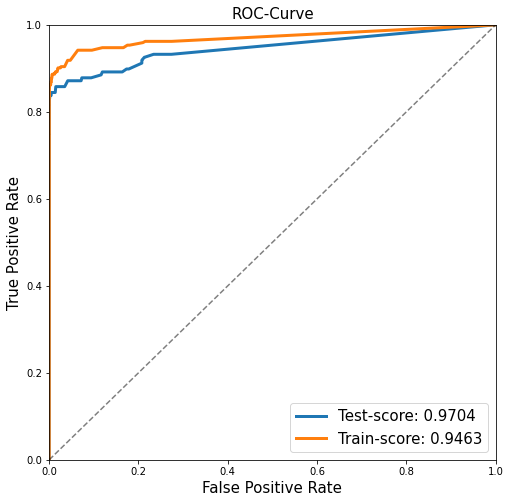

In [32]:
fig = plt.figure(figsize=(8, 8))
plt.title("ROC-Curve", size=15)
fpr, tpr, _ = roc_curve(y_test, y_pred_test[:, 1])
plt.plot(fpr, tpr, linewidth=3, label=f"Test-score: {round(score_train, 4)}")

fpr, tpr, _ = roc_curve(y_train, y_pred_train[:, 1])
plt.plot(fpr, tpr, linewidth=3, label=f"Train-score: {round(score_test, 4)}")
plt.plot([0,1], [0,1], color="black", alpha=0.5, linestyle="--")
plt.xlabel("False Positive Rate", size=15)
plt.ylabel("True Positive Rate", size=15)
plt.legend(loc="best", fontsize=15)
plt.xlim(0, 1)
plt.ylim(0, 1)